# Régression polynomiale simple

In [1]:
import pandas as pd 
import numpy as np

from sklearn.datasets import make_regression

import seaborn as sns
from matplotlib import pyplot as plt

## Création du dataset

In [2]:
#cette fois, nous avons un dataset à notre disposition
df = pd.read_csv("DDT.data",delimiter=" ")

print(df.head)

#on enleve les lignes et colonnes nulles ainsi que la colonne Obs et Unnamded
df = df.dropna(axis=1)
df = df.drop(["Unnamed: 0", "Obs"], axis=1)
print(df.head)

<bound method NDFrame.head of     Unnamed: 0  Obs  Age  TxDDT  Unnamed: 4
0            1    1    2   0.20         NaN
1            2    2    2   0.25         NaN
2            3    3    2   0.18         NaN
3            4    4    3   0.19         NaN
4            5    5    3   0.29         NaN
5            6    6    3   0.28         NaN
6            7    7    4   0.31         NaN
7            8    8    4   0.33         NaN
8            9    9    4   0.36         NaN
9           10   10    5   0.71         NaN
10          11   11    5   0.38         NaN
11          12   12    5   0.47         NaN
12          13   13    6   1.10         NaN
13          14   14    6   0.87         NaN
14          15   15    6   0.83         NaN>
<bound method NDFrame.head of     Age  TxDDT
0     2   0.20
1     2   0.25
2     2   0.18
3     3   0.19
4     3   0.29
5     3   0.28
6     4   0.31
7     4   0.33
8     4   0.36
9     5   0.71
10    5   0.38
11    5   0.47
12    6   1.10
13    6   0.87
14    6   

In [3]:
x = np.array(df["Age"])
y = np.array(df["TxDDT"])
x = x.reshape(x.shape[0], 1)
y=y.reshape(y.shape[0], 1)

print(x.shape)
print(y.shape)
print(x)
print(y)

(15, 1)
(15, 1)
[[2]
 [2]
 [2]
 [3]
 [3]
 [3]
 [4]
 [4]
 [4]
 [5]
 [5]
 [5]
 [6]
 [6]
 [6]]
[[0.2 ]
 [0.25]
 [0.18]
 [0.19]
 [0.29]
 [0.28]
 [0.31]
 [0.33]
 [0.36]
 [0.71]
 [0.38]
 [0.47]
 [1.1 ]
 [0.87]
 [0.83]]


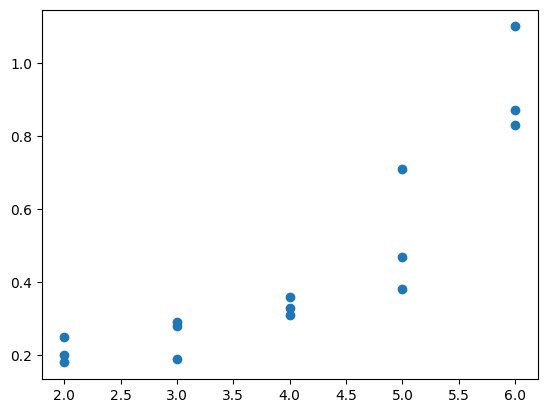

In [4]:
# Représentation graphique du modèle
plt.scatter(x,y)

## Modèle

In [5]:
#notre modèle qui calcule les y_predictions en fonction de x
def model(X, theta):
    return np.dot(X, theta)

## Fonction de coûts

In [6]:
#Notre modèle n'est pas très efficace, on créé donc une fonction de coût F qui est la moyenne des erreurs quadratiques
def cout(X, y, theta):
    return (1/(2*len(y))) * np.sum((model(X, theta) - y)**2)


## Descente de Gradient (DG)

In [7]:
#Maintenant, on utilise la descente de gradients pour minimiser la fonction F et trouver les paramètres a, b optimaux
def gradient(X, y, theta):
    return (1/len(y)) * np.dot(X.T, (model(X, theta) - y))

def descenteGradient(X, y, theta, learning_rate, n_iterations):
    histCout=np.zeros(n_iterations)
    for iteration in range(0, n_iterations):
        theta = theta - learning_rate*gradient(X, y, theta)
        histCout[iteration]= cout(X,y,theta)

    return theta, histCout

def coefDet(y, y_predictions):
    u=((y-y_predictions)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

## Prédiction du modèle à l'aide d'une régression linéaire simple

In [8]:
#on créé une matrice de contenant tous les x, et une colonne de 1 pour simplifier les calculs
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)
print(X)

(15, 2)
[[2. 1.]
 [2. 1.]
 [2. 1.]
 [3. 1.]
 [3. 1.]
 [3. 1.]
 [4. 1.]
 [4. 1.]
 [4. 1.]
 [5. 1.]
 [5. 1.]
 [5. 1.]
 [6. 1.]
 [6. 1.]
 [6. 1.]]


In [9]:
#ici, on est face à un problème de regression linéaire, où le modèle F est une fonction affine avec 2 paramètres a et b, tel que F(x) = ax + b
#on stocke dans une matrice nommée theta, les paramètres a et b
#on prend pour l'instant deux entiers a et b aléatoires pour voir comment s'en sort notre modèle
theta = np.random.randn(2,1)
print(theta.shape)
print(theta)

(2, 1)
[[-0.92703134]
 [-0.56028603]]


In [10]:
#on calcule les y_predictions
y_predictions = model(X, theta)
print(y_predictions.shape)
print(y_predictions)

(15, 1)
[[-2.41434871]
 [-2.41434871]
 [-2.41434871]
 [-3.34138005]
 [-3.34138005]
 [-3.34138005]
 [-4.26841139]
 [-4.26841139]
 [-4.26841139]
 [-5.19544274]
 [-5.19544274]
 [-5.19544274]
 [-6.12247408]
 [-6.12247408]
 [-6.12247408]]


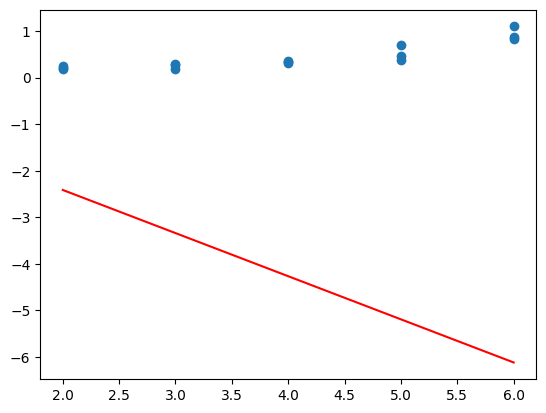

In [11]:
#on affiche notre modèle
plt.scatter(x,y)
plt.plot(x,y_predictions, c='r')


#on constate que notre modèle n'est pas très fidèle à la réalité, il faut donc optimiser les paramètres a et b pour trouver le bon modèle.

In [12]:
F = cout(X, y, theta)
print(F)

12.347279557699034


In [13]:
#on calcule les nouveaux paramètres theta
resultDescenteGradient = descenteGradient(X, y, theta, 0.001, 1000)
newTheta = resultDescenteGradient[0]
varCout = resultDescenteGradient[1]

print(newTheta.shape)
print(newTheta)
#print(varCout)

(2, 1)
[[ 0.1865448 ]
 [-0.30338243]]


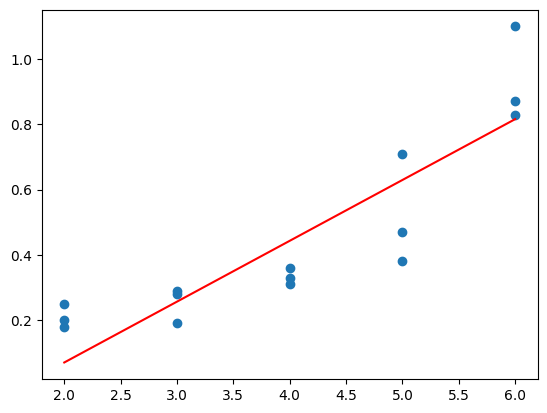

In [14]:
#on calcule de nouveaux les y_predictions avec les bon theta
y_predictions = model(X, newTheta)

plt.scatter(x, y)
plt.plot(x, y_predictions, c='red')

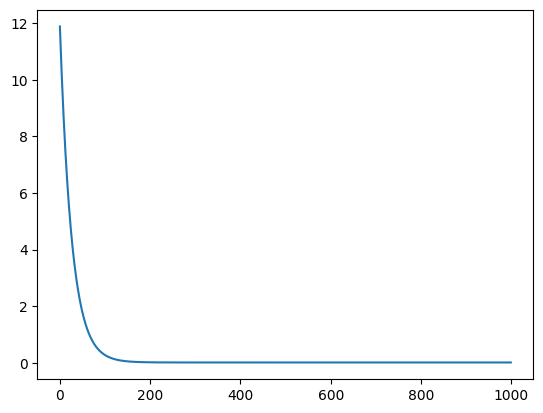

In [15]:
#on affiche la variation des couts au fil de la descente des gradients
plt.plot([i for i in range(1000)], varCout)

In [16]:
#on calcule le coefficient de prédiction, plus le chiffre est proche de 1, mieux la prédiction est fidèle à la réalité
coeffPredictions = coefDet(y, y_predictions)
print(coeffPredictions)

#on constate que la régression linéaire ne produit pas un assez bon modèle, on utilise donc un autre modèle qui est la régression polynomiale F avec maintenant 3 paramètres a, b et c, tel que F(x) = ax^2 + bx + c

0.7552633439400338


## Prédiction du modèle à l'aide d'une régression polynômiale 

In [17]:
#il suffit de changer le theta, et X
theta_pol = np.random.randn(3,1)
print(theta_pol.shape)
print(theta_pol)

(3, 1)
[[ 1.11861671]
 [-0.79666517]
 [ 0.26951952]]


In [18]:
X_pol = np.hstack((x**2, x, np.ones(x.shape)))
print(X_pol.shape)
print(X_pol)

(15, 3)
[[ 4.  2.  1.]
 [ 4.  2.  1.]
 [ 4.  2.  1.]
 [ 9.  3.  1.]
 [ 9.  3.  1.]
 [ 9.  3.  1.]
 [16.  4.  1.]
 [16.  4.  1.]
 [16.  4.  1.]
 [25.  5.  1.]
 [25.  5.  1.]
 [25.  5.  1.]
 [36.  6.  1.]
 [36.  6.  1.]
 [36.  6.  1.]]


In [24]:
#on optimise le modèle avec la descente de gradient
resultDescenteGradientPol = descenteGradient(X_pol, y, theta_pol, 0.002, 1000)
newThetaPol = resultDescenteGradientPol[0]
varCoutPol = resultDescenteGradientPol[1]

print(newThetaPol.shape)
print(newThetaPol)

(3, 1)
[[ 0.0726523 ]
 [-0.36641309]
 [ 0.56823593]]


[[0.12601896]
 [0.12601896]
 [0.12601896]
 [0.12286739]
 [0.12286739]
 [0.12286739]
 [0.26502042]
 [0.26502042]
 [0.26502042]
 [0.55247806]
 [0.55247806]
 [0.55247806]
 [0.9852403 ]
 [0.9852403 ]
 [0.9852403 ]]


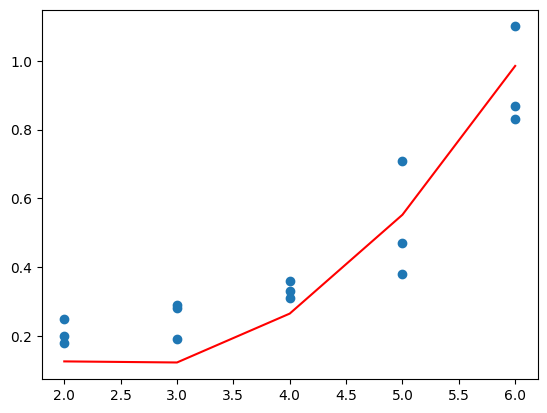

In [25]:
y_predictions_pol = model(X_pol, newThetaPol)
print(y_predictions_pol)
plt.scatter(x, y)
plt.plot(x, y_predictions_pol, c='red')

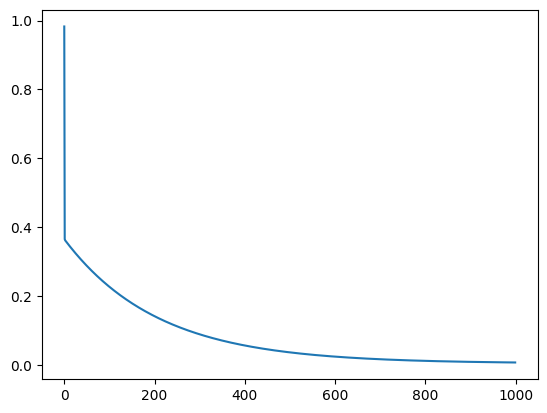

In [26]:
#on affiche la variation des couts au fil de la descente des gradients
plt.plot([i for i in range(1000)], varCoutPol)

In [27]:
#on calcule le coefficient de prédiction, plus le chiffre est proche de 1, mieux la prédiction est fidèle à la réalité
coeffPredictions_pol = coefDet(y, y_predictions_pol)
print(coeffPredictions_pol)

0.8199775301679632
